# 导包

In [1]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# 导入数据

In [2]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
combine = [train_df.copy(),test_df.copy()]

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 查看数据

---

## 属性解释
- PassengerId：一个用以标记每个乘客的数字id
- Survived：标记乘客是否幸存——幸存(1)、死亡(0)。我们将预测这一列。
- Pclass：标记乘客所属船层——第一层(1),第二层(2),第三层(3)。
- Name：乘客名字。
- Sex：乘客性别——男male、女female
- Age：乘客年龄。部分。
- SibSp：船上兄弟姐妹和配偶的数量。
- Parch：船上父母和孩子的数量。
- Ticket：乘客的船票号码。
- Fare：乘客为船票付了多少钱。
- Cabin：乘客住在哪个船舱。
- Embarked：乘客从哪个地方登上泰坦尼克号。

我们都知道妇女和儿童更可能被救。因此，年龄和性别很可能更好的帮助我们预测。认为乘客的船层可能会影响结果也是符合逻辑的，因为第一层的船舱更靠近船的甲板。Fare票价和乘客所住船层相关，而且可能是高度相关的，但是也可能会增加一些额外的信息。SibSp、Parch兄弟姐妹、配偶、父母/孩子的数量很可能关系到是否被某一个或很多个人救，会有很多人去帮助你或者有很多人想到你尝试去救你。
像Embarked登船(也许有一些信息和怎么靠近船的顶部的人的船舱有关),Ticket票号和Name名字。

In [3]:
train_df.info()
# train_df.head()
# print(train_df.describe())
# print(train_df.columns.values)
# print(test_df.columns.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# 数据分析和数据清洗

## 数据类型
- 7个特征是整型或者浮点型，测试集中有6个
- 5个特征是字符串型

In [4]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 样本中连续样本的分布
这有助于我们确定除了其他早期见解之外，实际问题领域的培训数据集的代表性如何。

- 总共891个样本，占Titanic样本(2224)中的41%
- Survived 是一个0-1的类别特征
- 样本中存活率为38%，实际是32%
- 大多数乘客（75%）没有父母和小孩在船上
- 大约30%的乘客有兄弟或者配偶在船上
- 只有小于1%的乘客的船费大于512美元
- 35-80岁的乘客小于1%

## 类别特征的分布

- Name在数据集中的每一个值都是唯一的(count=unique=891)
- Sex变量有两个可能的值，male占65%(top=male, freq=577/count=891)
- Cabin有一些样本的值是一样的，可能是有一些乘客共用一个船舱
- Embarked有3个值，大多数乘客都是S(top=S)
- Ticket有22%的重复率(unique=681)

In [5]:
# train_df.describe(include=['object'])
# train_df.describe(include=['number'])
train_df.describe(include='all')
# train_df['Survived'].describe(percentiles=[.61, .62])
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 1. PassengerId

- 重复率为0，不包含信息，对结果没有贡献，删掉

In [6]:
for dataset in combine:
    dataset.drop(['PassengerId'],axis=1,inplace=True)

# combine[0].head()

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Survived

- 目标标签，不做处理

## 3. Pclass

- 分组对存活率求均值，发现各组不同，特征有用保留，或者使用get_dummies进行特征扩充

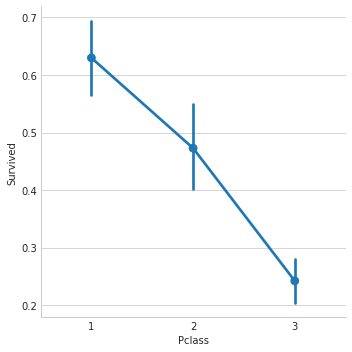

In [7]:
sns.factorplot('Pclass','Survived',order=[1,2,3], data=train_df,size=5)

for dataset in combine:
    # create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
    dummies = pd.get_dummies(dataset['Pclass'])
    dummies.columns = ['Class_1','Class_2','Class_3']
    dataset = dataset.join(dummies)
    dataset.drop(['Class_3'], axis=1, inplace=True)
    dataset.drop(['Pclass'],axis=1,inplace=True)

## 4. Name

- 值的重复率为0，删除或者提取title，正则匹配，开头为大写字母，.结尾的子字符串

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
import re

# A function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# Map each title to an integer.  Some titles are very rare, and are compressed into the same codes as other titles.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}

for dataset in combine:   
    # Get all the titles and print how often each one occurs.
    titles = dataset['Name'].apply(get_title)
    titles = titles.map(title_mapping)
    # Add in the title column.
    titles[titles.isnull()] = 0
    dataset['Title'] = titles
    dataset['Title'].astype(int)
    dataset.drop(['Name'],axis=1,inplace=True)

## 5. Sex

- 从背景就可以知道女人小孩存活率高，所以贡献大
- 类别特征，转化成数值型，或者使用get_dummies进行特征扩充

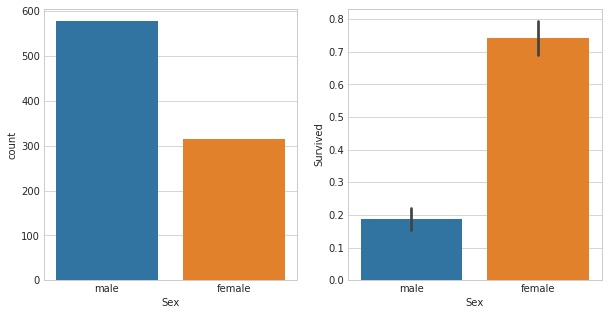

In [10]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='Sex',data=train_df,ax=axis1,order=['male','female'])
sns.barplot(x='Sex',y='Survived',data=train_df,ax=axis2,order=['male','female'])

sex_mapping = {'female' : 0, 'male' : 1}
for dataset in combine:
    sexs = dataset['Sex'].map(sex_mapping)
    dataset['Sex'] = sexs

## 6. Age

- 小孩存活率高，对结果贡献率大
- 有缺失值需要补全
- 区间划分

缺失值处理可选方法：
1. 用同均值方差的随机数补全
2. 用其他相关的特征（Age, Gender, and Pclass）进行分类，然后取中位数进行补全
3. 综合1和2，先分类，然后取均值方差随机数进行补全

- 1和3会带来新的噪声，所以选择2

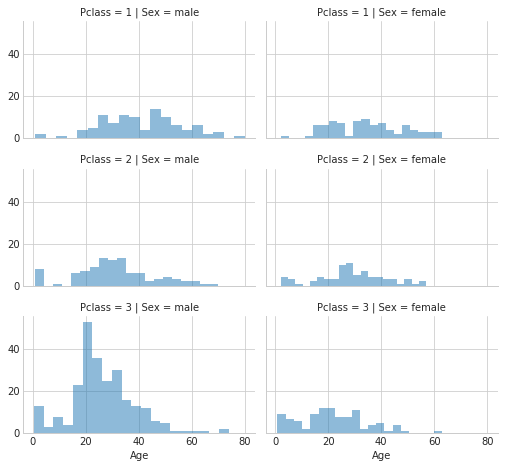

In [11]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

guess_ages = np.zeros((2,3))
for dataset in combine:
    # 计算中位数
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
    
    # 补全
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)
    
    # 区间划分
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

## 7. SibSp+Parch=Family

 - 构造一个新特征，在船上的家人人数

In [12]:
for dataset in combine:
    dataset['Family'] = dataset['SibSp']+dataset['Parch']+1
    dataset.drop(['SibSp'],axis=1,inplace=True)
    dataset.drop(['Parch'],axis=1,inplace=True)
    
combine[0][['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


## 8. Ticket

- 重复率22%，而且和目标相关性小，所以删掉

In [13]:
for dataset in combine:
    dataset.drop(['Ticket'],axis=1,inplace=True)

## 9. Fare

- 用中位数补全缺失值
- 对Fare进行区间划分

In [14]:
for dataset in combine:
    dataset['Fare'].fillna(dataset['Fare'].dropna().median(),inplace=True)
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

## 10. Cabin

- 缺失值太多，处理缺失值带入大量噪声，包含信息量少，删掉

In [15]:
for dataset in combine:
    dataset.drop(['Cabin'],axis=1,inplace=True)

## 11. Embarked

- 用出现频率最高的补全缺失值
- 转化为数值型

In [16]:
freq_port = train_df.Embarked.dropna().mode()[0]

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

print(train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False))

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


## 12. Pclass*Age

In [17]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

## 13. IsAlone

In [18]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['Family'] == 1, 'IsAlone'] = 1

## FamilyId NameLength

In [19]:
combine[0].head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family,Age*Class,IsAlone
0,0,3,1,1,0,0,1,2,3,0
1,1,1,0,2,3,1,3,2,2,0
2,1,3,0,1,1,0,2,1,3,1
3,1,1,0,2,3,0,3,2,2,0
4,0,3,1,2,1,0,1,1,6,1


In [20]:
combine[1].head()

,Pclass,Sex,Age,Fare,Embarked,Title,Family,Age*Class,IsAlone
0,3,1,2,0,2,1.0,1,6,1
1,3,0,2,0,0,3.0,2,6,0
2,2,1,3,1,2,1.0,1,6,1
3,3,1,1,1,0,1.0,1,3,1
4,3,0,1,1,0,3.0,3,3,0


In [21]:
combine[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null int64
Age          891 non-null int64
Fare         891 non-null int64
Embarked     891 non-null int64
Title        891 non-null int64
Family       891 non-null int64
Age*Class    891 non-null int64
IsAlone      891 non-null int64
dtypes: int64(10)
memory usage: 69.7 KB


## 皮尔逊相关系数热图

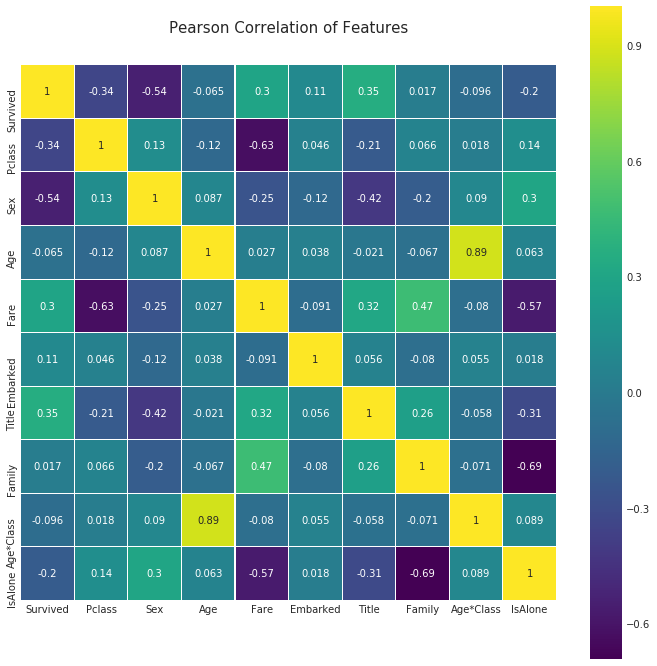

In [22]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(combine[0].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

# 构造训练集和测试集

In [23]:
X_train = combine[0].drop(['Survived'],axis=1).values
y_train = combine[0]['Survived'].ravel()
X_test = combine[1].values
type(X_train), X_train.shape, type(y_train), y_train.shape, type(X_train), X_test.shape

(numpy.ndarray, (891, 9), numpy.ndarray, (891,), numpy.ndarray, (418, 9))

# 进行训练和预测

## sklearn机器学习方法封装

In [49]:
# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)
    
    def score(self, x, y):
        return self.clf.score(x,y)
    
class SklearnHelper_norandom(object):
    def __init__(self, clf, params=None):
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)
    
    def score(self, x, y):
        return self.clf.score(x,y)

## out-of-fold交叉验证方法封装

In [25]:
def get_oof(clf_help, X_train, y_train, X_test, NFOLDS=5, SEED=0):
    ntrain = X_train.shape[0]
    ntest = X_test.shape[0]
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))
    
    kf = KFold(n_splits=NFOLDS, random_state=SEED, shuffle=False)
    for i, (train_index, test_index) in enumerate(kf.split(X_train,y_train)):
        x_tr = X_train[train_index]
        y_tr = y_train[train_index]
        x_te = X_train[test_index]

        clf_help.train(x_tr, y_tr)

        oof_train[test_index] = clf_help.predict(x_te)
        oof_test_skf[i, :] = clf_help.predict(X_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

## Logistic Regression
逻辑回归是在工作流早期运行的有用模型。 逻辑回归通过使用逻辑函数估计概率来衡量分类因变量（特征）与一个或多个独立变量（特征）之间的关系，其是累积逻辑分布

- 训练集和评价集是同一个

In [26]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Y_pred = logreg.predict(X_test)
# acc_log = round(logreg.score(X_train, y_train) * 100, 2)
# print(acc_log)

coeff_df = pd.DataFrame(combine[0].columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
2,Age,0.374815
5,Title,0.323551
3,Fare,0.299896
4,Embarked,0.210376
0,Pclass,-0.204282
8,IsAlone,-0.373236
7,Age*Class,-0.399418
6,Family,-0.420627
1,Sex,-2.264402


## 设置模型参数

In [ ]:
# Random Forests Parameters
rf_tuned_params = {
#     'n_jobs': -1,
    'n_estimators': range(100,600,100),
#      'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': [5,6,7,None],
    'min_samples_leaf': [1,2,3,0.1,0.3,0.5],
    'max_features' : ['sqrt','auto','log2',None],
#     'verbose': 0
}
rf_clf = GridSearchCV(RandomForestClassifier(n_jobs=-1,warm_start=True,verbose=0),rf_tuned_params,cv=5)
rf_clf.fit(X_train,y_train)
print("Best paramters set found:", rf_clf.best_params_)
# print("Grid score:")
# for params, mean_score, scores in rf_clf.grid_scores_:
#     print("\t%0.3f (+\-%0.03f) for %s" % (mean_score, scores.std() * 2, params))

In [ ]:
# Extra Trees Parameters
et_tuned_params = {
#     'n_jobs': -1,
    'n_estimators':range(100,600,100),
    'max_features': ['sqrt','auto','log2',None,0.1,0.3,0.5,0.7,0.9],
    'max_depth': [4,5,6,7,8,None],
    'min_samples_leaf': [1,2,3,0.1,0.3,0.5],
#     'verbose': 0
}
et_clf = GridSearchCV(ExtraTreesClassifier(n_jobs=-1,verbose=0),et_tuned_params,cv=5)
et_clf.fit(X_train,y_train)
print("Best paramters set found:", et_clf.best_params_)
# print("Grid score:")
# for params, mean_score, scores in et_clf.grid_scores_:
#     print("\t%0.3f (+\-%0.03f) for %s" % (mean_score, scores.std() * 2, params))

In [29]:
# AdaBoost parameters
ada_tuned_params = {
    'n_estimators': range(100,1000,100),
    'learning_rate' : [0.2,0.5,0.75,1]
}
ada_clf = GridSearchCV(AdaBoostClassifier(),ada_tuned_params,cv=5)
ada_clf.fit(X_train,y_train)
print("Best paramters set found:", ada_clf.best_params_)
# print("Grid score:")
# for params, mean_score, scores in ada_clf.grid_scores_:
#     print("\t%0.3f (+\-%0.03f) for %s" % (mean_score, scores.std() * 2, params))

('Best paramters set found:', {'n_estimators': 100, 'learning_rate': 0.2})


In [37]:
# Gradient Boosting parameters
gb_tuned_params = {
    'n_estimators': range(100,600,100),
    'max_features': ['sqrt','auto','log2',0.1,0.2,0.5], 
    'max_depth': [4,5,None],
    'min_samples_leaf': [1,2,0.1,0.5],
#     'verbose': 0
}
gb_clf = GridSearchCV(GradientBoostingClassifier(verbose=0),gb_tuned_params,cv=5)
gb_clf.fit(X_train,y_train)
print("Best paramters set found:", gb_clf.best_params_)
# print("Grid score:")
# for params, mean_score, scores in gb_clf.grid_scores_:
#     print("\t%0.3f (+\-%0.03f) for %s" % (mean_score, scores.std() * 2, params))

('Best paramters set found:', {'max_features': 'auto', 'n_estimators': 100, 'max_depth': 4, 'min_samples_leaf': 1})


In [30]:
# Support Vector Classifier parameters 
svc_tuned_params = {
#     'kernel' : ['linear','poly','sigmoid','precomputed'],
    'kernel' : ['linear','sigmoid'], 
    'C' : [0.0025,0.01,0.02,0.025,0.03,0.25,0.3,0.5,0.7]
    }
svc_clf = GridSearchCV(SVC(verbose=0),svc_tuned_params,cv=5)
svc_clf.fit(X_train,y_train)
print("Best paramters set found:", svc_clf.best_params_)
# print("Grid score:")
# for params, mean_score, scores in svc_clf.grid_scores_:
#     print("\t%0.3f (+\-%0.03f) for %s" % (mean_score, scores.std() * 2, params))

('Best paramters set found:', {'kernel': 'linear', 'C': 0.02})


In [35]:
# Decision Tree Classfifier parameters
dtc_tuned_params = {
    'criterion' : ['gini','entropy'], 
    'splitter' : ['best','random'], 
    'max_depth': [4,5,None],
    'min_samples_split' : [2,3,0.1,0.3,0.5], 
    'max_features': ['sqrt','auto','log2',0.1,0.2,0.5], 
    'max_leaf_nodes' : [None,2,3,4,5]
}
dtc_clf = GridSearchCV(DecisionTreeClassifier(),dtc_tuned_params,cv=5)
dtc_clf.fit(X_train,y_train)
print("Best paramters set found:", dtc_clf.best_params_)
# print("Grid score:")
# for params, mean_score, scores in dtc_clf.grid_scores_:
#     print("\t%0.3f (+\-%0.03f) for %s" % (mean_score, scores.std() * 2, params))

('Best paramters set found:', {'splitter': 'best', 'max_leaf_nodes': None, 'min_samples_split': 0.1, 'criterion': 'gini', 'max_features': 'auto', 'max_depth': 5})


In [44]:
# K Neighbors Classifier
knn_tuned_params = {
    'n_neighbors' : range(3,10), 
    'weights' : ['uniform','distance'], 
    'algorithm' : ['auto','ball_tree','kd_tree','brute'], 
    'leaf_size' : range(1,30,2)
}
knn_clf = GridSearchCV(KNeighborsClassifier(),knn_tuned_params,cv=5)
knn_clf.fit(X_train,y_train)
print("Best paramters set found:", knn_clf.best_params_)
# print("Grid score:")
# for params, mean_score, scores in knn_clf.grid_scores_:
#     print("\t%0.3f (+\-%0.03f) for %s" % (mean_score, scores.std() * 2, params))

('Best paramters set found:', {'n_neighbors': 5, 'weights': 'uniform', 'leaf_size': 1, 'algorithm': 'ball_tree'})


In [52]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 100,
    'learning_rate' : 0.2
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 100,
     'max_features': 'auto',
    'max_depth': 4,
    'min_samples_leaf': 1,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.02
    }

# Decision Tree Classfifier parameters
dtc_params = {
    'criterion' : 'gini', 
    'splitter' : 'best', 
    'max_depth': 5,
    'min_samples_split' : 0.1, 
    'max_features': 'auto', 
    'max_leaf_nodes' : None
}

# K Nearest Neighbors Classifier parameters
knn_params = {
    'n_neighbors' : 5, 
    'weights' : 'uniform', 
    'algorithm' : 'ball_tree', 
    'leaf_size' : 1
}

In [53]:
SEED = 0
# Create 5 objects that represent our 4 models
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)
dtc = SklearnHelper(clf=DecisionTreeClassifier, seed=SEED, params=dtc_params)
knn = SklearnHelper_norandom(clf=KNeighborsClassifier, params=knn_params)

et_oof_train, et_oof_test = get_oof(et, X_train, y_train, X_test) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,X_train, y_train, X_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, X_train, y_train, X_test) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,X_train, y_train, X_test) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc,X_train, y_train, X_test) # Support Vector Classifier
dtc_oof_train, dtc_oof_test = get_oof(dtc,X_train, y_train, X_test) # Decision Trees Classifier
knn_oof_train, knn_oof_test = get_oof(knn,X_train, y_train, X_test) # K Nearest Neighbor

In [54]:
base_predictions_train = pd.DataFrame( {'RandomForest': rf_oof_train.ravel(),
        'ExtraTrees': et_oof_train.ravel(),
        'AdaBoost': ada_oof_train.ravel(),
        'GradientBoost': gb_oof_train.ravel(), 
        'SupportVectorMachine' : svc_oof_train.ravel(), 
        'DecisionTree' : dtc_oof_train.ravel(), 
        'K Nearest Neighbor' : knn_oof_train.ravel()
    })
base_predictions_train.head()

,AdaBoost,DecisionTree,ExtraTrees,GradientBoost,K Nearest Neighbor,RandomForest,SupportVectorMachine
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
X_train2 = np.concatenate(( et_oof_train, rf_oof_train, ada_oof_train, gb_oof_train, svc_oof_train, dtc_oof_train, knn_oof_train), axis=1)
X_test2 = np.concatenate(( et_oof_test, rf_oof_test, ada_oof_test, gb_oof_test, svc_oof_test, dtc_oof_test, knn_oof_test), axis=1)

In [ ]:
gbm_tuned_params= {
    'n_estimators' : range(100,2000,200), 
    'learning_rate' : [0.01,0.02,0.05,0.1,0.2], 
    'max_depth' : [3,4,5], 
    'min_child_weight' : [1,2,3], 
    'gamma' : [0.8,0.9,1], 
    'subsample' : [0.7,0.8,0.9], 
    'colsample_bytree' : [0.7,0.8,0.9], 
    'scale_pos_weight' : [0.9,1,1.1]
}

gbm_clf = GridSearchCV(xgb.XGBClassifier(verbose=0),gbm_tuned_params,cv=5)
gbm_clf.fit(X_train,y_train)
print("Best paramters set found:", gbm_clf.best_params_)
# print("Grid score:")
# for params, mean_score, scores in gbm_clf.grid_scores_:
#     print("\t%0.3f (+\-%0.03f) for %s" % (mean_score, scores.std() * 2, params))

In [59]:
gbm = xgb.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(X_train2, y_train)
predictions = gbm.predict(X_test2)

In [60]:
predictions = predictions.astype(int)
submission = pd.DataFrame({
        "PassengerId": test_df['PassengerId'],
        "Survived": predictions
    })
submission.to_csv('../input/submission.csv', index=False)